In [99]:
import json
import tweepy
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#load your API keys
file_name ="C:\\Users\\spaug\\Python\\KU_Coding\\kubootcamp0\\kubootcamp0\\api_keys.json"
data = json.load(open(file_name))

consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [20]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [21]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [22]:
# Target User Account
target_users = ["@bbc", '@cbs','@cnn', '@foxnews', '@nytimes']

'VinjOvHa7v9gUou11vkvR0r3xWKZcwwTwtY5mwEnwJZwUfRYsX'

In [153]:
compound_list = []
sn_list = []
positive_list = []
negative_list = []
neutral_list = []
date_list = []
text_list = []

# create lists of all values and symbol pairs
for x in range(0,len(target_users)):  
    for y in range(5): # 5 pages of tweets = 100 tweets
        public_tweets = api.user_timeline(target_users[x], page=y)
        for tweet in public_tweets:
            target_string = tweet['text']
            target_user_name = tweet['user']['screen_name']
            compound = analyzer.polarity_scores(target_string)["compound"]
            pos = analyzer.polarity_scores(tweet['text'])["pos"]
            neu = analyzer.polarity_scores(target_string)["neu"]
            neg = analyzer.polarity_scores(target_string)["neg"]
            date = tweet['created_at']
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            sn_list.append(target_user_name)
            date_list.append(date)
            text_list.append(target_string)

In [154]:
# joining lists into dictionary then into dataframe
values_dict = {'screen_name'  : sn_list, 
               'compound' : compound_list,
               'positive' : positive_list,
               'negative' : negative_list,
               'neutral'  : neutral_list,
               'date'     : date_list,
               'text'     : text_list
                }
values_df = pd.DataFrame(values_dict)

In [217]:
# dictionary of dataframes by screen_name
dataframe = {}
dataframes = {}
news_sources = values_df.screen_name.unique()
for x in range(0,len(news_sources)):
    dataframe[x] = values_df[values_df['screen_name'] == news_sources[x]]
    dataframe[x] = dataframe[x].reset_index()
    dataframe[x] = dataframe[x].reset_index()
    dataframes[x] = dataframe[x].iloc[:, [7,3,8,2,4,5,6]]
    dataframes[x].to_csv(news_sources[x] + '.csv')

In [156]:
dataframe[0].head()

,level_0,index,compound,date,negative,neutral,positive,screen_name,text
0,0,0,0.0000,Fri Feb 02 20:04:03 +0000 2018,0.0,1.00,0.00,BBC,A young woman investigates the historic disapp...
1,1,1,0.0000,Fri Feb 02 19:32:04 +0000 2018,0.0,1.00,0.00,BBC,"Tonight, @NigelSlater cooks and eats with the ..."
2,2,2,0.0000,Fri Feb 02 19:00:07 +0000 2018,0.0,1.00,0.00,BBC,🤼 Ever heard of the Russian martial art 'Syste...
3,3,3,0.4588,Fri Feb 02 18:30:06 +0000 2018,0.0,0.85,0.15,BBC,🍞😋 When toast gets really tasty...\n\nHere are...
4,4,4,0.0000,Fri Feb 02 17:31:01 +0000 2018,0.0,1.00,0.00,BBC,'Oh hey............ man.'\n\n😂 When you run in...


In [167]:
plt.style.use('ggplot')
%matplotlib inline

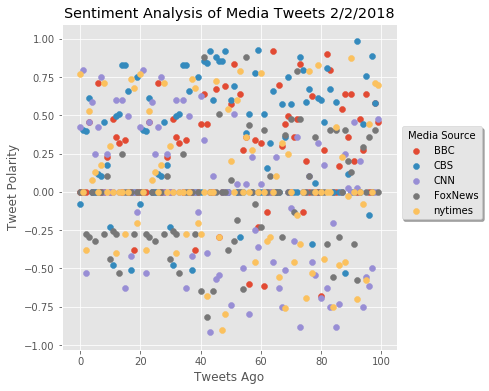

In [253]:
plt.figure(figsize=(6,6))
plt.title('Sentiment Analysis of Media Tweets 2/2/2018')
plt.scatter(dataframe[0]['level_0'], dataframe[0]['compound'], label=dataframe[0]['screen_name'][0])
plt.scatter(dataframe[1]['level_0'], dataframe[1]['compound'], label=dataframe[1]['screen_name'][0])
plt.scatter(dataframe[2]['level_0'], dataframe[2]['compound'], label=dataframe[2]['screen_name'][0])
plt.scatter(dataframe[3]['level_0'], dataframe[3]['compound'], label=dataframe[3]['screen_name'][0])
plt.scatter(dataframe[4]['level_0'], dataframe[4]['compound'], label=dataframe[4]['screen_name'][0])
plt.legend(bbox_to_anchor=(1, 0.7), shadow=True, ncol=1, title='Media Source')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.savefig('sentiment.png', bbox_inches='tight')

In [254]:
media_list = []
compound_mean_list = []
for x in range(0,len(dataframe)):
    compound_mean_list.append(dataframe[x]['compound'].mean())
    media_list.append(dataframe[x]['screen_name'][0])
    

In [255]:
compound_df = pd.DataFrame(media_list, compound_mean_list)
compound_df = compound_df.reset_index()

In [256]:
compound_df.columns = ['Compound Average', 'Media Source']

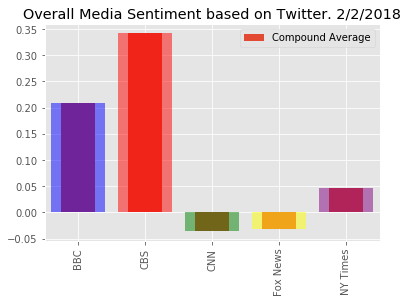

In [258]:
compound_df.plot(kind='bar')
colors = ['blue','red','green','yellow', 'purple']
objects = ('BBC', 'CBS', 'CNN','Fox News', 'NY Times')
y_pos = np.arange(len(objects))
plt.bar(y_pos, compound_df['Compound Average'], align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, objects)
plt.title('Overall Media Sentiment based on Twitter. 2/2/2018')
plt.savefig('barchart.png')